In [4]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

## Test

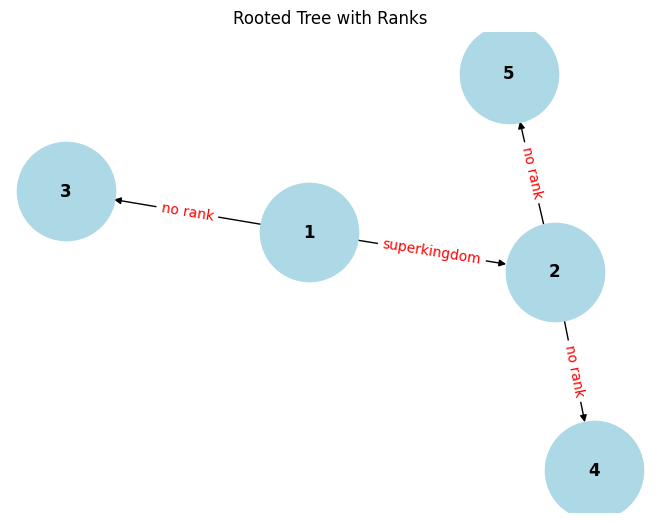

The graph is a rooted tree.
The graph is a directed acyclic graph (DAG).
The graph is not a directed graph with cycles.
There are 5 nodes in this NCBI taxonomy.


In [5]:
file_path = "nodes_test.dmp"

df_test = pd.read_csv(file_path, delimiter = r"\s+\|\s+", usecols=[0, 1, 2], engine = "python", header=None, names = ["child", "parent", "rank"]) 

df_test.head()

G_test = nx.DiGraph()

first_row = True
# remove 1st row because it creates a cycle, whereas it only represents the root
for _, row in df_test.iterrows():
    if first_row:
            first_row = False
            continue
    parent, child, rank = row['parent'], row['child'], row['rank']
    G_test.add_edge(parent, child, rank=rank)

pos = nx.spring_layout(G_test)
nx.draw(G_test, pos, with_labels=True, node_size=5000, node_color='lightblue', font_size=12, font_weight='bold')
edge_labels = {(u, v): d['rank'] for u, v, d in G_test.edges(data=True)}
nx.draw_networkx_edge_labels(G_test, pos, edge_labels=edge_labels, font_color='red')
plt.title("Rooted Tree with Ranks")
plt.show()

# Check if it's a tree
is_rooted_tree = nx.is_tree(G_test)
if is_rooted_tree:
    print("The graph is a rooted tree.")
else:
    print("The graph is not a rooted tree.")

# Check if it's a DAG
is_dag = nx.is_directed_acyclic_graph(G_test)  
if is_dag:
    print("The graph is a directed acyclic graph (DAG).")
else:
    print("The graph is not a directed acyclic graph (DAG).")

is_cyclic = not is_rooted_tree and not is_dag
if is_cyclic:
    print("The graph is a directed graph with cycles.")
else:
    print("The graph is not a directed graph with cycles.")

node_count = G_test.number_of_nodes()
print(f'There are {node_count} nodes in this NCBI taxonomy.')

In [6]:
valid_ranks_test = ["superkingdom"]
mask_test = df['rank'].isin(valid_ranks_test)
filtered_df_test = df_test[mask_test]

filtered_df_test.head()

NameError: name 'df' is not defined

## Question 1 

#### DataFrame creation

In [7]:
file_path = "nodes.dmp"

df = pd.read_csv(file_path, delimiter = r"\s+\|\s+", usecols=[0, 1, 2], engine = "python", header=None, names = ["child", "parent", "rank"]) 


In [8]:
df.head()

,child,parent,rank
0,1,1,no rank
1,2,131567,superkingdom
2,6,335928,genus
3,7,6,species
4,9,32199,species


In [9]:
print("Parent column\n")
print(df[df['parent'] == 1])
print("\nChild column\n")
print(df[df['child'] == 1])

Parent column

           child  parent          rank
0              1       1       no rank
8257       10239       1  superkingdom
100508    131567       1       no rank
2320789  2787823       1       no rank
2320815  2787854       1       no rank

Child column

   child  parent     rank
0      1       1  no rank


The parent column is the 2nd one as node 1, which is the root so it can only be a parent, only appears in this column as we can see on the 2 filtered dataframes that respectively keep only the pairs containing a 1 in 1st column and 2nd column.

#### Graph creation

In [59]:
G = nx.DiGraph()

In [61]:
first_row = True
# remove 1st row because it creates a cycle, whereas it only represents the root
for _, row in df.iterrows():
    if first_row:
            first_row = False
            continue
    parent, child, rank = row['parent'], row['child'], row['rank']
    G.add_edge(parent, child, rank=rank)

## Question 2 

In [62]:
# Check if it's a tree
is_rooted_tree = nx.is_tree(G)
if is_rooted_tree:
    print("The graph is a rooted tree.")
else:
    print("The graph is not a rooted tree.")

# Check if it's a DAG
is_dag = nx.is_directed_acyclic_graph(G)  
if is_dag:
    print("The graph is a directed acyclic graph (DAG).")
else:
    print("The graph is not a directed acyclic graph (DAG).")

is_cyclic = not is_rooted_tree and not is_dag
if is_cyclic:
    print("The graph is a directed graph with cycles.")
else:
    print("The graph is not a directed graph with cycles.")


The graph is a rooted tree.
The graph is a directed acyclic graph (DAG).
The graph is not a directed graph with cycles.


## Question 3

In [63]:
node_count = G.number_of_nodes()
print(f'There are {node_count} nodes in this NCBI taxonomy.')

There are 2442791 nodes in this NCBI taxonomy.


## Question 4

In [70]:
valid_ranks = ["kingdom", "phylum", "class", "order", "family", "genus", "species"]
mask = df['rank'].isin(valid_ranks)
filtered_df = df[mask]

filtered_df.head()

,child,parent,rank
2,6,335928,genus
3,7,6,species
4,9,32199,species
5,10,1706371,genus
6,11,1707,species


## Question 5

## TODO 

chercher s'il y a des doublons